GSEAPY Example
--------------------------------------------

### Examples to use ``GSEApy`` inside python console

## 1.  Load essential packages

In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina' # mac
import pandas as pd
import gseapy as gp
import matplotlib.pyplot as plt

**Check gseapy version**

In [2]:
gp.__version__

'0.9.6'

**See all gseapy supported enrichr library names** 

Enrichr library could be used for ``gsea``, ``ssgsea``, and ``prerank``, too

In [3]:
names = gp.get_library_name()
names[:10]

['ARCHS4_Cell-lines',
 'ARCHS4_IDG_Coexp',
 'ARCHS4_Kinases_Coexp',
 'ARCHS4_TFs_Coexp',
 'ARCHS4_Tissues',
 'Achilles_fitness_decrease',
 'Achilles_fitness_increase',
 'Aging_Perturbations_from_GEO_down',
 'Aging_Perturbations_from_GEO_up',
 'Allen_Brain_Atlas_down']

## 2. Enrichr Example

### 1)  Assign enrichr with ``pd.Series``,  ``pd.DataFrame``, or ``list`` object

In [4]:
gene_list = pd.read_table("./data/gene_list.txt",header=None)
gene_list.head()

,0
0,CTLA2B
1,SCARA3
2,LOC100044683
3,CMBL
4,CLIC6


In [5]:
type(gene_list)

pandas.core.frame.DataFrame

In [6]:
# convert dataframe or series to list
glist = gene_list.squeeze().tolist()
print(glist[:10])

['CTLA2B', 'SCARA3', 'LOC100044683', 'CMBL', 'CLIC6', 'IL13RA1', 'TACSTD2', 'DKKL1', 'CSF1', 'CITED1']


#### a. gene_sets support list, str. Multi-libraries names supported 

In [7]:
# run enrichr
# if you are only intrested in dataframe that enrichr returned, please set no_plot=True

# list, dataframe, series inputs are supported
enr = gp.enrichr(gene_list="./data/gene_list.txt", 
                 # or gene_list='./gene_list.txt', or gene_list=glist
                 description='test_name', 
                 # or gene_sets='KEGG_2016,KEGG_2013',
                 # or gene_sets=['KEGG_2016','KEGG_2013'],
                 gene_sets='KEGG_2016', 
                 outdir='test/enrichr_kegg', 
                 cutoff=0.5 # test dataset, use lower value of range(0,1)
                )

In [8]:
# access results throught res2d attr
enr.res2d.head()

,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Z-score,Combined Score,Genes,Gene_set
0,Rap1 signaling pathway_Homo sapiens_hsa04015,19/211,0.000148,0.035223,0.000436,0.103734,-1.961363,17.295956,PDGFRB;CSF1;FLT4;VEGFC;ARAP3;LPAR4;ADCY7;ADCY6...,KEGG_2016
1,Pathways in cancer_Homo sapiens_hsa05200,27/397,0.000729,0.066282,0.001816,0.152127,-2.083086,15.046848,RET;LEF1;TGFA;LPAR4;ADCY7;ETS1;ADCY6;GLI2;FGF4...,KEGG_2016
2,Ras signaling pathway_Homo sapiens_hsa04014,18/227,0.000999,0.066282,0.002351,0.152127,-1.956845,13.519663,PDGFRB;CSF1;FLT4;VEGFC;ETS1;GNG13;FGF4;PLD2;EF...,KEGG_2016
3,Dilated cardiomyopathy_Homo sapiens_hsa05414,10/90,0.001114,0.066282,0.002557,0.152127,-1.805957,12.280169,DES;SGCB;TPM2;TNNC1;LMNA;TPM1;ITGAV;ADCY7;ADCY...,KEGG_2016
4,HTLV-I infection_Homo sapiens_hsa05166,19/258,0.001747,0.083151,0.003877,0.184562,-1.843079,11.703417,PDGFRB;STAT5B;EGR1;JUN;CD40;FZD2;CRTC3;NFATC1;...,KEGG_2016


#### b. Multi libraries input, and output results in one single dataframe

In [9]:
enr = gp.enrichr(gene_list="./data/gene_list.txt", 
                 # or gene_list='./gene_list.txt', or gene_list=glist
                 description='test_name', 
                 # or gene_sets='KEGG_2016,KEGG_2013',
                 gene_sets=['KEGG_2016', 'KEGG_2013'],
                 outdir='test/enrichr_kegg2', 
                 cutoff=0.5 # test dataset, use lower value of range(0,1)
                )

In [10]:
enr.results.head(5)

,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Z-score,Combined Score,Genes,Gene_set
0,Rap1 signaling pathway_Homo sapiens_hsa04015,19/211,0.000148,0.035223,0.000436,0.103734,-1.961363,17.295956,PDGFRB;CSF1;FLT4;VEGFC;ARAP3;LPAR4;ADCY7;ADCY6...,KEGG_2016
1,Pathways in cancer_Homo sapiens_hsa05200,27/397,0.000729,0.066282,0.001816,0.152127,-2.083086,15.046848,RET;LEF1;TGFA;LPAR4;ADCY7;ETS1;ADCY6;GLI2;FGF4...,KEGG_2016
2,Ras signaling pathway_Homo sapiens_hsa04014,18/227,0.000999,0.066282,0.002351,0.152127,-1.956845,13.519663,PDGFRB;CSF1;FLT4;VEGFC;ETS1;GNG13;FGF4;PLD2;EF...,KEGG_2016
3,Dilated cardiomyopathy_Homo sapiens_hsa05414,10/90,0.001114,0.066282,0.002557,0.152127,-1.805957,12.280169,DES;SGCB;TPM2;TNNC1;LMNA;TPM1;ITGAV;ADCY7;ADCY...,KEGG_2016
4,HTLV-I infection_Homo sapiens_hsa05166,19/258,0.001747,0.083151,0.003877,0.184562,-1.843079,11.703417,PDGFRB;STAT5B;EGR1;JUN;CD40;FZD2;CRTC3;NFATC1;...,KEGG_2016


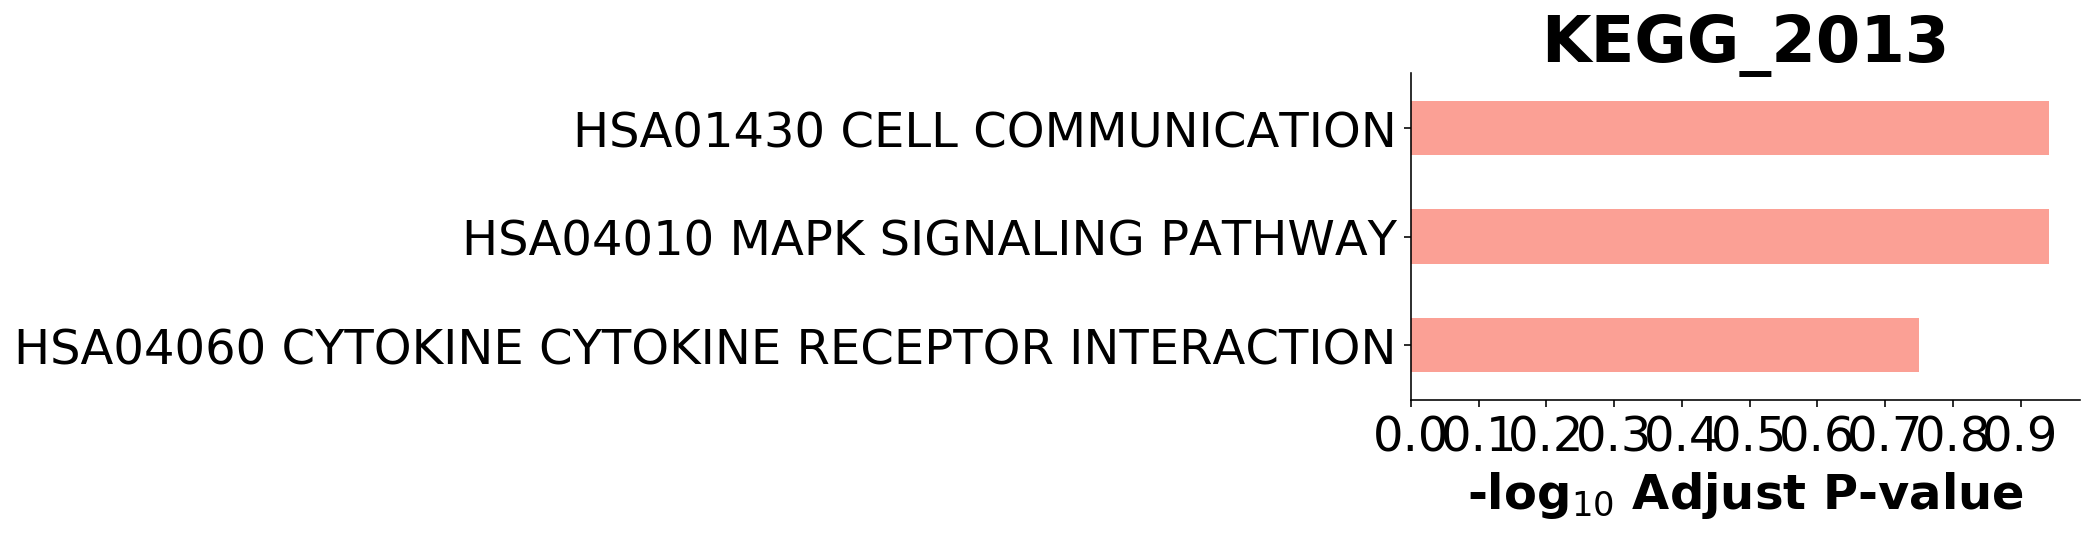

In [11]:
# simple plotting function
from gseapy.plot import barplot
barplot(enr.res2d,title='KEGG_2013', cutoff=0.2,figsize=(6,3))

### 2) Command line usage 

You may also want to use enrichr in command line  

the option **-v** will print out the progress of your job

In [12]:
# !gseapy enrichr -i ./data/gene_list.txt \
#                 --ds BP2017 \
#                 -g GO_Biological_Process_2017 \
#                 -v -o test/enrichr_BP

## 3. Prerank example

### 1) Assign prerank()  with a pd.DataFrame, pd.Series , or a txt file
Do not include header in your gene list !  
GSEApy will skip any comment lines startswith "#".  
Only contains two columns, or one cloumn with gene_name indexed when assign a ``DataFrame`` to prerank

In [13]:
rnk = pd.read_table("./data/edb/gsea_data.gsea_data.rnk", header=None)
rnk.head()

,0,1
0,CTLA2B,2.502482
1,SCARA3,2.095578
2,LOC100044683,1.116398
3,CMBL,0.877640
4,CLIC6,0.822181


In [14]:
# run prerank
# enrichr libraries are supported by prerank module. Just provide the name
# use 4 process to acceralate the permutation speed
pre_res = gp.prerank(rnk=rnk, gene_sets='KEGG_2016', 
                     processes=4,
                     permutation_num=100, # reduce number to speed up test
                     outdir='test/prerank_report_kegg',format='png')

In [15]:
#access results through res2d attribute or results
pre_res.res2d.head()

,es,nes,pval,fdr,geneset_size,matched_size,genes,ledge_genes
Term,,,,,,,,
Pathways in cancer_Homo sapiens_hsa05200,-0.188934,-0.955908,0.500000,0.509363,397,27,TGFBR2;LAMB3;RET;PDGFRB;ADCY6;ETS1;TGFA;WNT9A;...,VEGFC;LPAR4;LEF1;RUNX1T1
Cytokine-cytokine receptor interaction_Homo sapiens_hsa04060,0.418234,1.460650,0.077922,0.707741,265,18,IL13RA1;CSF1;CCL2;TGFBR2;CD40;IL10RB;CXCL10;CX...,IL13RA1;CSF1;CCL2;TGFBR2;CD40;IL10RB;CXCL10
PI3K-Akt signaling pathway_Homo sapiens_hsa04151,0.191372,0.801069,0.701299,0.790792,341,22,CSF1;EFNA1;COL6A1;THBS4;LAMB3;PDGFRB;GNG13;FLT...,CSF1;EFNA1;COL6A1;THBS4;LAMB3
HTLV-I infection_Homo sapiens_hsa05166,0.338286,1.278282,0.243243,0.796209,258,19,CRTC3;TGFBR2;CD40;PDGFRB;ADCY6;PPP3CC;ETS1;WNT...,CRTC3;TGFBR2;CD40;PDGFRB;ADCY6;PPP3CC;ETS1;WNT...
MAPK signaling pathway_Homo sapiens_hsa04010,0.179667,0.653685,0.875000,0.835703,255,18,CACNA1H;TGFBR2;FLNC;MAP3K5;PDGFRB;PPP3CC;NFATC...,CACNA1H;TGFBR2;FLNC;MAP3K5;PDGFRB;PPP3CC


### How to customize your GSEA plot inside python console  
visualize it using ``gseaplot``

In [16]:
# extract geneset terms in res2d
terms = pre_res.res2d.index
terms

Index(['Pathways in cancer_Homo sapiens_hsa05200',
       'Cytokine-cytokine receptor interaction_Homo sapiens_hsa04060',
       'PI3K-Akt signaling pathway_Homo sapiens_hsa04151',
       'HTLV-I infection_Homo sapiens_hsa05166',
       'MAPK signaling pathway_Homo sapiens_hsa04010',
       'Rap1 signaling pathway_Homo sapiens_hsa04015',
       'Focal adhesion_Homo sapiens_hsa04510',
       'Metabolic pathways_Homo sapiens_hsa01100',
       'Ras signaling pathway_Homo sapiens_hsa04014'],
      dtype='object', name='Term')

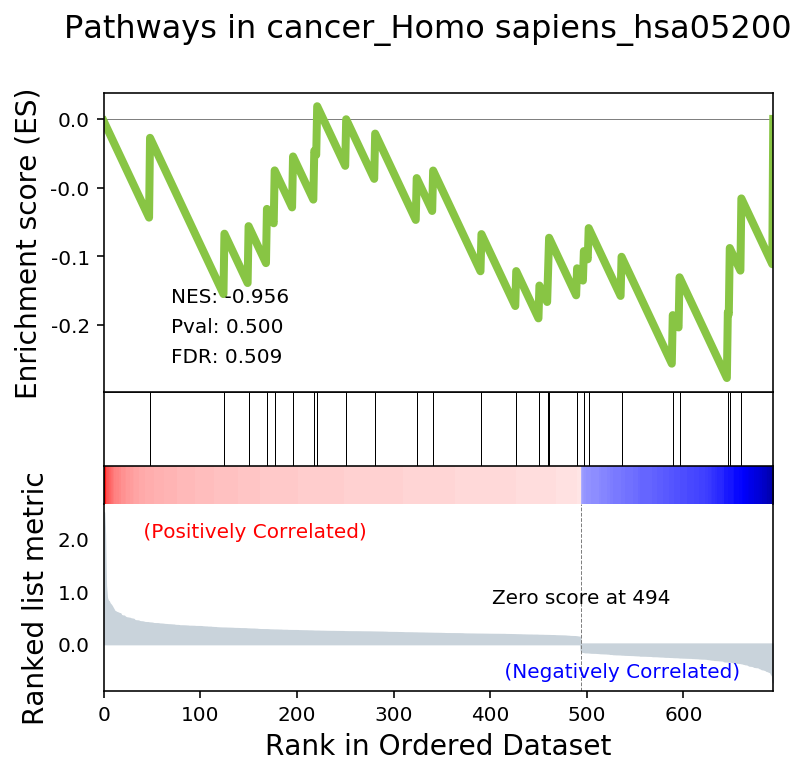

In [17]:
## easy way
from gseapy.plot import gseaplot
gseaplot(rank_metric=pre_res.ranking, term=terms[0], **pre_res.results[terms[0]])

### 2) Command line usage 

You may also want to use prerank in command line

In [18]:
# ! gseapy prerank -r temp.rnk -g temp.gmt -o prerank_report_temp

## 4. GSEA Example

### 1)  Assign gsea() with a pandas DataFrame, .gct format file, or a text file

and cls with a list object or just .cls format file 

In [19]:
phenoA, phenoB, class_vector =  gp.parser.gsea_cls_parser("./data/P53.cls")

In [20]:
#class_vector used to indicate group attributes for each sample
print(class_vector)

['MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'WT', 'WT', 'WT', 'WT', 'WT', 'WT', 'WT', 'WT', 'WT', 'WT', 'WT', 'WT', 'WT', 'WT', 'WT', 'WT', 'WT']


In [21]:
gene_exp = pd.read_table("./data/P53.txt")
gene_exp.head()

,NAME,DESCRIPTION,786-0,BT-549,CCRF-CEM,COLO 205,EKVX,HCC-2998,HCT-15,HOP-62,...,MCF7,MOLT-4,NCI-H460,OVCAR-4,SF-539,SK-MEL-5,SR,UACC-257,UACC-62,UO-31
0,TACC2,na,46.05,82.17,16.87,98.60,141.02,114.32,134.34,44.95,...,68.14,32.21,105.89,64.99,53.52,85.47,18.69,32.16,45.70,48.13
1,C14orf132,na,108.34,59.04,25.61,33.11,42.53,9.12,9.36,310.96,...,159.32,10.71,13.59,53.78,57.57,86.80,17.30,102.66,62.16,73.44
2,AGER,na,42.20,25.75,76.01,40.41,32.17,48.28,58.27,42.40,...,51.50,61.48,44.44,45.68,54.17,62.53,83.18,56.57,50.40,36.75
3,32385_at,na,7.43,13.94,8.55,21.13,15.09,19.05,16.47,7.60,...,30.77,21.27,13.36,16.19,12.07,17.62,22.60,4.50,14.59,11.33
4,RBM17,na,11.40,3.00,3.16,2.34,4.43,1.56,6.04,6.16,...,1.62,2.77,4.42,8.91,12.28,3.04,10.13,8.32,8.23,3.91


In [22]:
print("positively correlated: ", phenoA)

positively correlated:  MUT


In [23]:
print("negtively correlated: ", phenoB)

negtively correlated:  WT


In [24]:
# run gsea
# enrichr libraries are supported by gsea module. Just provide the name

gs_res = gp.gsea(data=gene_exp, # or data='./P53_resampling_data.txt'
                 gene_sets='KEGG_2016', # enrichr library names
                 cls= './data/P53.cls', # cls=class_vector
                 #set permutation_type to phenotype if samples >=15
                 permutation_type='phenotype', 
                 permutation_num=100, # reduce number to speed up test
                 outdir=None,  # do not write output to disk
                 no_plot=True, # Skip plotting
                 method='signal_to_noise',
                 processes=4,
                 format='png')

In [25]:
#access the dataframe results throught res2d attribute
gs_res.res2d.head()

,es,nes,pval,fdr,geneset_size,matched_size,genes,ledge_genes
Term,,,,,,,,
Fat digestion and absorption_Homo sapiens_hsa04975,-0.521341,-1.651064,0.000000,0.446527,41,25,DGAT1;PPAP2A;PPAP2C;PPAP2B;ACAT2;AGPAT2;GOT2;F...,APOA1;PLA2G1B;SCARB1;CEL;PNLIPRP1;APOA4;APOB;A...
Cytokine-cytokine receptor interaction_Homo sapiens_hsa04060,-0.363417,-1.452817,0.056075,0.483066,265,193,TNFRSF1B;OSMR;IL6ST;IL7R;TNFRSF21;CX3CR1;NGFR;...,EPO;PDGFA;CCR7;TNFRSF10C;TNFRSF10B;IL3;CXCL9;I...
Tuberculosis_Homo sapiens_hsa05152,-0.349150,-1.472489,0.011364,0.504340,178,144,EP300;SYK;BCL10;RELA;LAMP2;IRAK1;PPP3CB;IFNGR1...,HLA-DRA;STAT1;HLA-DMA;RAB5B;IFNA5;JAK2;PLA2R1;...
Pentose and glucuronate interconversions_Homo sapiens_hsa00040,-0.503415,-1.461575,0.086538,0.507330,36,19,AKR1A1;RPE;ALDH3A2;SORD;UGP2;KL;ALDH2;XYLB;GUS...,GUSB;UGT2B17;UGT2B15;UGT2A1;UGDH;AKR1B1;ALDH1B...
Regulation of autophagy_Homo sapiens_hsa04140,-0.478912,-1.453050,0.091667,0.507885,39,22,PRKAA1;IFNA2;GABARAPL2;IFNA10;IFNA16;GABARAP;U...,PIK3C3;PRKAA2;IFNA5;BECN1;IFNG;INS;IFNA14;PIK3...


### 2) Show the gsea plots

The **gsea** module will generate heatmap for genes in each gene sets in the backgroud.  
But if you need to do it yourself, use the code below

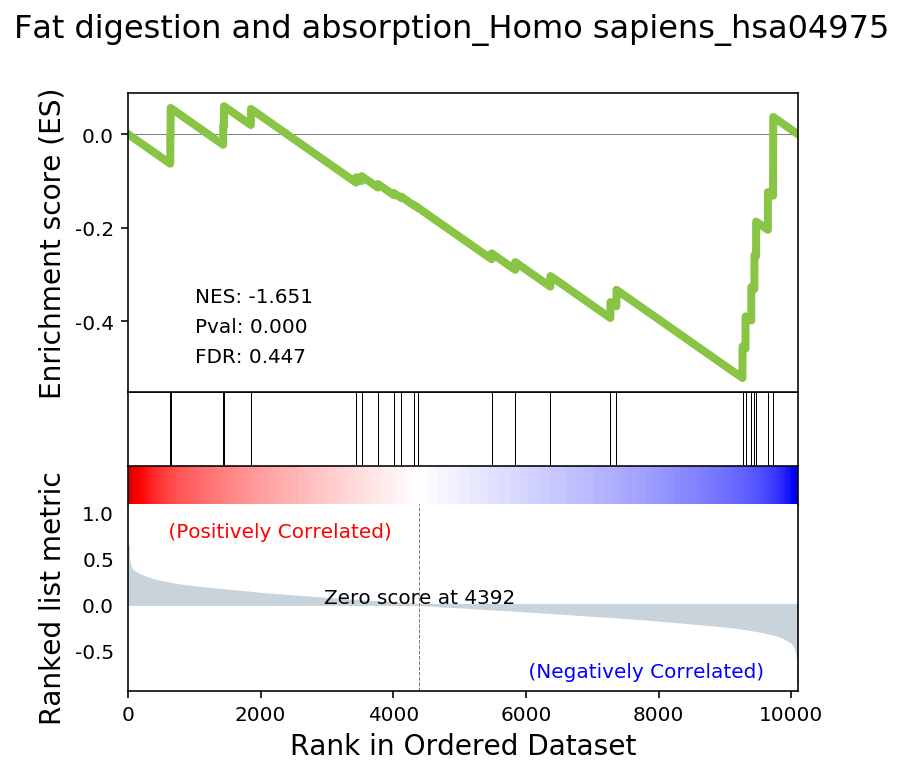

In [26]:
from gseapy.plot import gseaplot, heatmap
terms = gs_res.res2d.index
gseaplot(gs_res.ranking, term=terms[0], **gs_res.results[terms[0]])

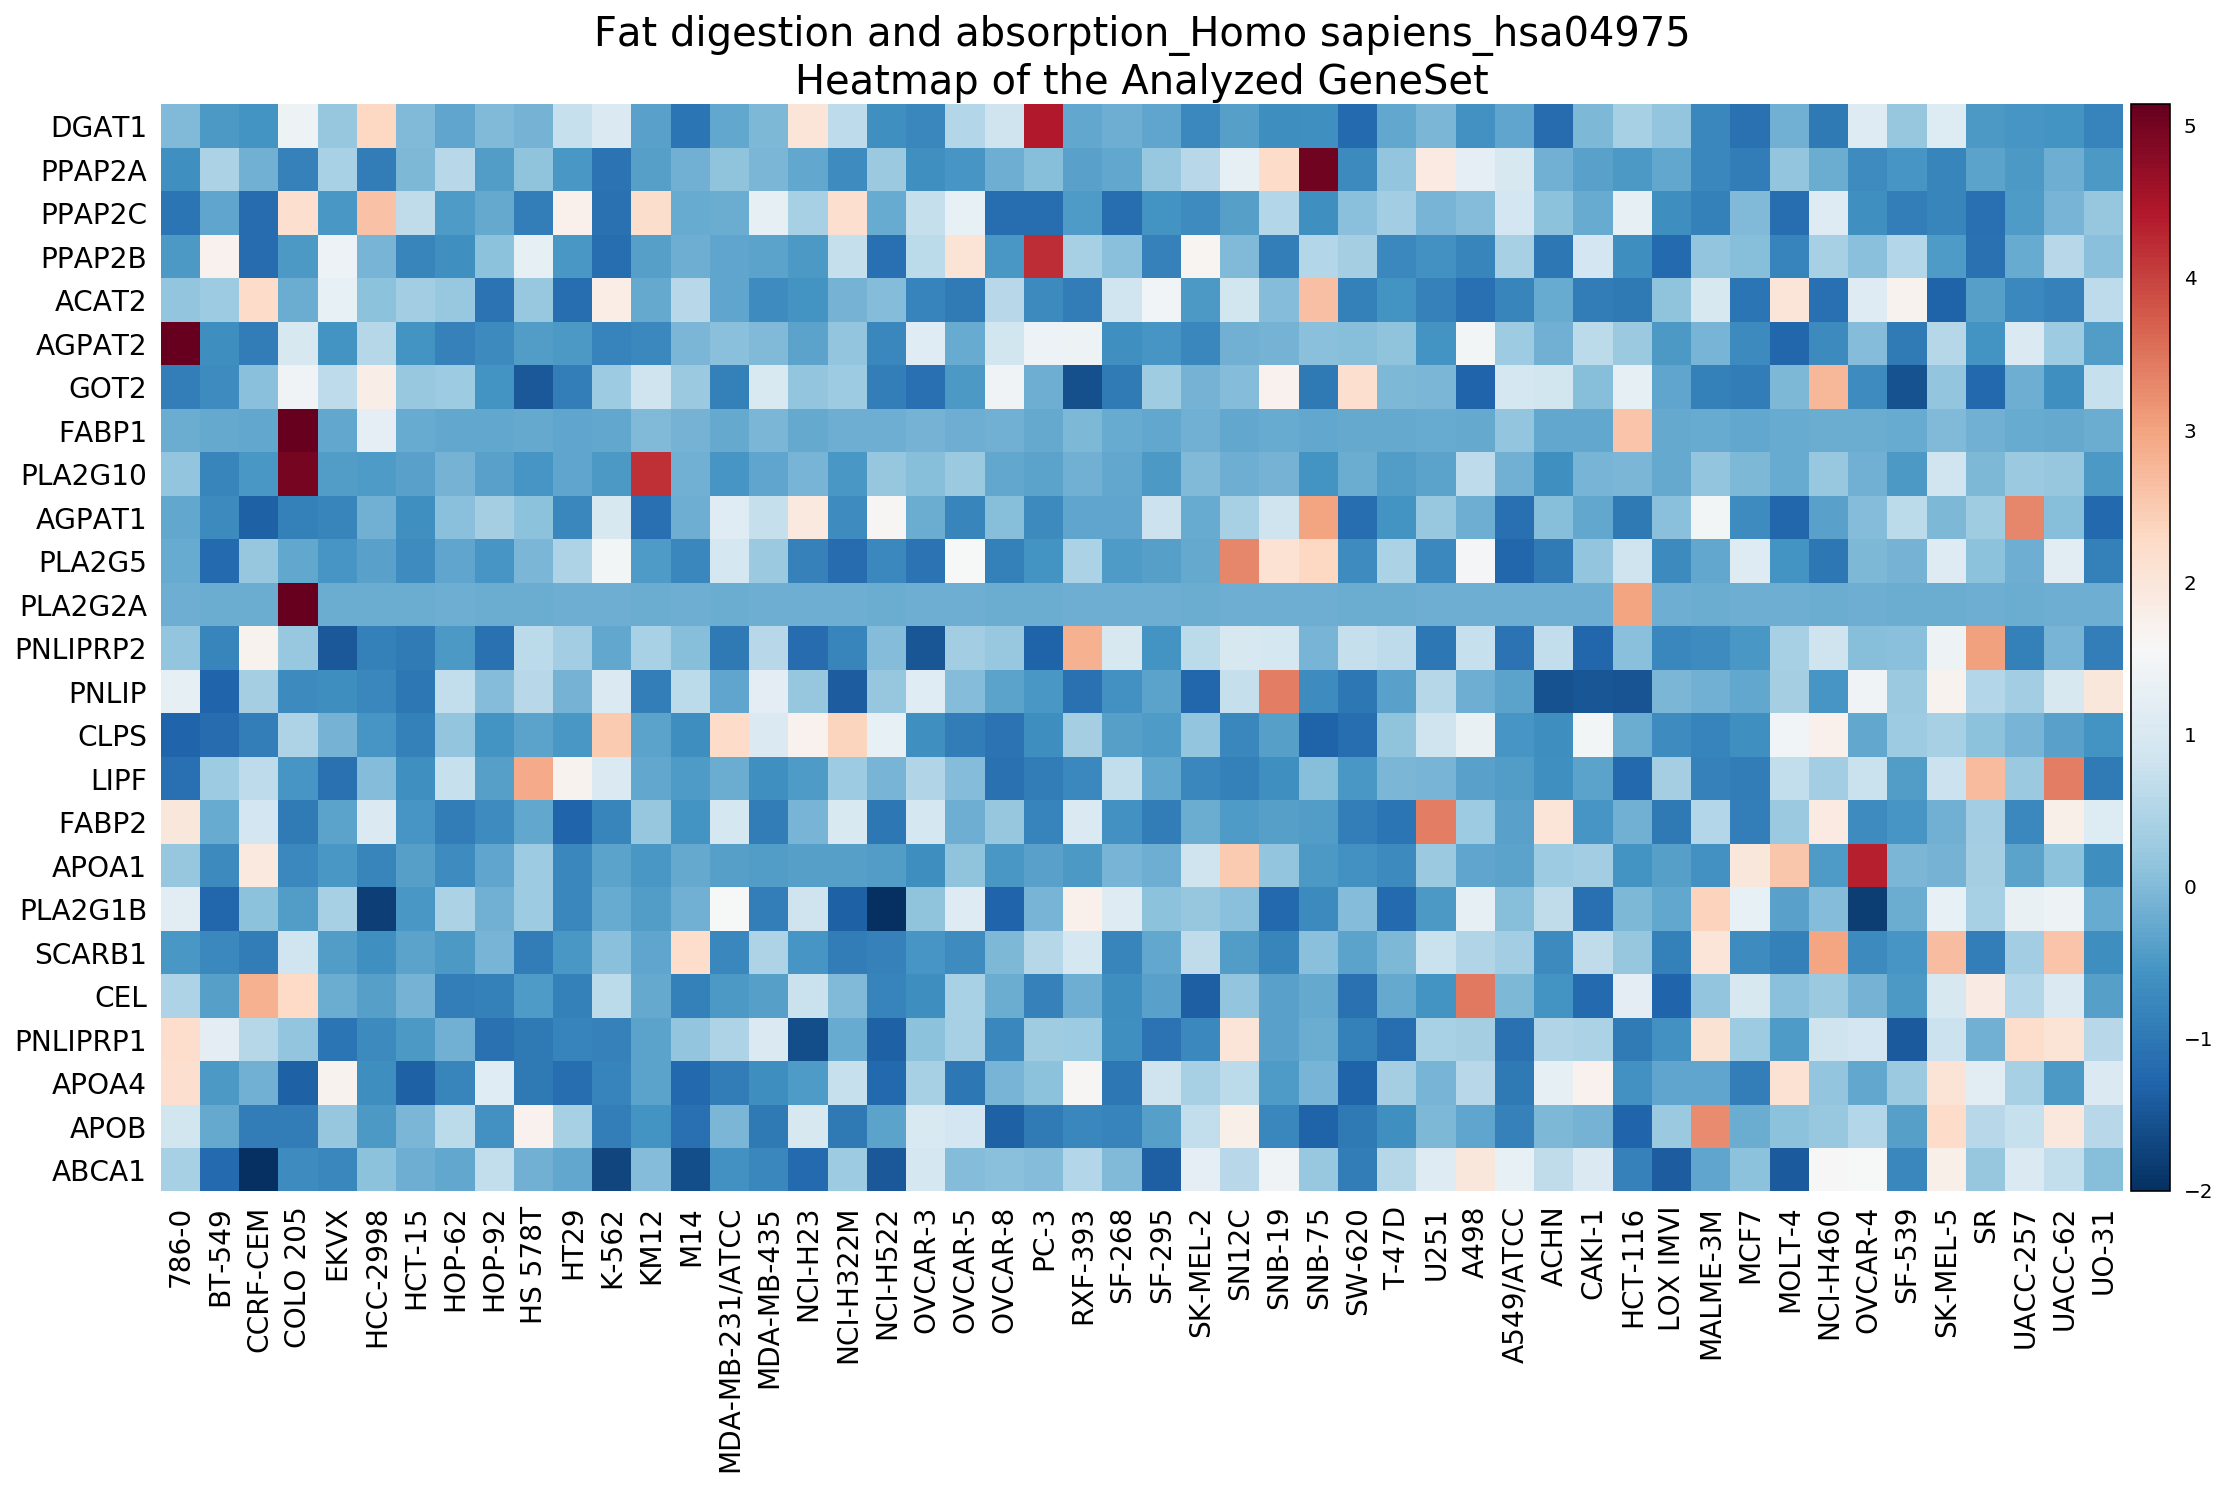

In [27]:
# plotting heatmap
genes = gs_res.res2d.genes[0].split(";")
heatmap(df = gs_res.heatmat.loc[genes], title=terms[0], figsize=(18,6))

In [28]:
gs_res.heatmat.head()

,786-0,BT-549,CCRF-CEM,COLO 205,EKVX,HCC-2998,HCT-15,HOP-62,HOP-92,HS 578T,...,MCF7,MOLT-4,NCI-H460,OVCAR-4,SF-539,SK-MEL-5,SR,UACC-257,UACC-62,UO-31
NAME,,,,,,,,,,,,,,,,,,,,,
FLJ13052,274.02001,380.93001,229.56001,392.25001,213.38001,422.41001,266.19001,315.45001,280.85001,304.96001,...,231.24001,275.94001,285.15001,174.49001,312.66001,184.20001,212.36001,324.69001,257.71001,211.67001
RP2,31.07001,67.03001,64.24001,36.79001,79.55001,54.96001,48.21001,42.77001,54.36001,39.73001,...,17.51001,61.14001,39.52001,18.90001,25.37001,14.26001,33.66001,23.37001,17.13001,67.75001
GPSM2,39.48001,63.56001,34.61001,16.58001,35.71001,49.07001,78.19001,22.95001,49.41001,38.52001,...,43.56001,17.72001,12.56001,26.98001,49.33001,16.39001,24.32001,14.30001,11.01001,33.58001
GSTT1,245.73001,146.37001,34.25001,231.69001,212.12001,249.05001,215.40001,38.97001,80.50001,152.89001,...,169.79001,64.63001,193.53001,53.23001,85.70001,65.78001,64.89001,216.34001,70.73001,46.79001
TUSC4,120.66001,182.14001,359.86001,269.77001,189.40001,494.58001,240.74001,156.12001,277.99001,191.25001,...,212.01001,268.32001,219.86001,179.79001,234.89001,235.53001,192.33001,127.70001,171.92001,129.34001


### 3) Command line usage 

You may also want to use gsea in command line

In [29]:
# !gseapy gsea -d ./data/P53_resampling_data.txt \
#              -g KEGG_2016 -c ./data/P53.cls \
#              -o test/gsea_reprot_2 \
#              -v --no-plot \
#              -t phenotype

## 5. Single Sample GSEA example

**Note: When you run ssGSEA, all genes names in your gene_sets file should be found in your expression table**

### 1) Assign ssgsea() with a txt file, gct file, pd.DataFrame, or pd.Seires(gene name as index).  


In [30]:
# txt, gct file input
ss = gp.ssgsea(data="./data/testSet_rand1200.gct",
               gene_sets="./data/randomSets.gmt", 
               outdir='test/ssgsea_report', 
               sample_norm_method='rank', # choose 'custom' for your own rank list
               permutation_num=0, # skip permutation procedure, because you do need it
               no_plot=True, # skip plotting to speed up
               processes=4, format='png')

In [31]:
# or assign a dataframe, or Series to ssgsea()
ssdf = pd.read_table("./data/temp.txt",header=None)
ssdf.head()

,0,1
0,ATXN1,16.456753
1,UBQLN4,13.989493
2,CALM1,13.745533
3,DLG4,12.796588
4,MRE11A,12.787631


In [32]:
# dataframe with one column is also supported by ssGSEA or Prerank
# But you have to set gene_names as index
ssdf2 = ssdf.set_index(0)
ssdf2.head()

,1
0,
ATXN1,16.456753
UBQLN4,13.989493
CALM1,13.745533
DLG4,12.796588
MRE11A,12.787631


In [33]:
type(ssdf2)

pandas.core.frame.DataFrame

In [34]:
ssSeries = ssdf2.squeeze()
type(ssSeries)

pandas.core.series.Series

In [35]:
# reuse data
df = pd.read_table("./data/P53_resampling_data.txt")
df.head()

,NAME,786-0,BT-549,CCRF-CEM,COLO 205,EKVX,HCC-2998,HCT-15,HOP-62,HOP-92,...,MCF7,MOLT-4,NCI-H460,OVCAR-4,SF-539,SK-MEL-5,SR,UACC-257,UACC-62,UO-31
0,CTLA2B,111.19,86.22,121.85,75.19,208.62,130.59,124.72,324.09,242.71,...,163.76,59.50,134.12,152.09,197.46,137.79,81.53,123.37,81.41,180.78
1,SCARA3,460.30,558.34,183.55,37.29,158.00,43.61,80.83,300.08,1250.25,...,109.91,120.42,73.06,115.03,95.12,37.56,76.16,41.10,77.51,519.17
2,LOC100044683,97.25,118.94,81.17,119.51,119.88,107.73,165.57,203.97,135.43,...,222.84,124.98,114.75,141.66,170.19,147.70,157.48,152.18,98.89,118.06
3,CMBL,33.45,55.10,221.67,50.30,35.12,75.70,84.01,44.12,79.96,...,51.32,117.11,59.46,78.46,45.55,49.07,96.69,33.09,10.38,52.89
4,CLIC6,35.75,41.26,63.04,219.86,42.53,54.19,86.98,71.20,53.89,...,154.05,31.62,37.66,32.64,63.35,27.95,70.99,36.25,17.50,49.41


In [36]:
# Series, DataFrame Example
# supports dataframe and series
ssgs = []
for i, dat in enumerate([ssdf, ssdf2, ssSeries, df]):
    sstemp = gp.ssgsea(data=dat, 
                       gene_sets="./data/genes.gmt", 
                       outdir='test/ssgsea_report_'+str(i),
                       scale=False, # set scale to False to get real original ES
                       permutation_num=0, # skip permutation procedure, because you do need it
                       no_plot=True, # skip plotting to speed up
                       processes=4, 
                       format='png')
    ssgs.append(sstemp)

2018-10-15 13:00:42,374 Warning: dropping duplicated gene names, only keep the first values


### 2) Access Enrichment Score (ES) and NES

results save to two attribute:

1. obj.resultsOnSamples: ES
2. obj.res2d: NES

In [37]:
# normalized es save to res2d attri
# one sample input
# NES
ssgs[0].res2d.head()

,1
Term|NES,
BvA_UpIN_A,2.150114
BvA_UpIN_B,2.953848
DvA_UpIN_A,1.985451
DvA_UpIN_D,2.457489
YvX_UpIN_X,2.148816


**Note**: 
If you want to obtain the real original enrichment score,  
you have to set ``scale=False``

In [38]:
# ES
# convert dict to DataFrame
es = pd.DataFrame(ssgs[-1].resultsOnSamples)
es.head()

,786-0,BT-549,CCRF-CEM,COLO 205,EKVX,HCC-2998,HCT-15,HOP-62,HOP-92,HS 578T,...,MCF7,MOLT-4,NCI-H460,OVCAR-4,SF-539,SK-MEL-5,SR,UACC-257,UACC-62,UO-31
Term|ES,,,,,,,,,,,,,,,,,,,,,
DvA_UpIN_A,45.703475,6.724266,11.881146,20.639710,36.753558,3.530987,5.257504,33.003838,29.227462,41.404387,...,4.304996,17.789549,19.172561,37.144472,40.135942,18.082717,13.901976,44.562272,52.021549,51.156682
DvA_UpIN_D,82.960021,86.151980,88.176462,65.077923,80.856467,63.085467,53.584047,73.531016,85.803567,87.688120,...,72.525357,85.020685,76.225849,90.948093,97.684104,62.334470,68.252995,73.484066,68.122566,86.657296


In [39]:
# if set scale to True, then 
# Scaled ES equal to es/gene_numbers
ses = es/df.shape[0]
ses

,786-0,BT-549,CCRF-CEM,COLO 205,EKVX,HCC-2998,HCT-15,HOP-62,HOP-92,HS 578T,...,MCF7,MOLT-4,NCI-H460,OVCAR-4,SF-539,SK-MEL-5,SR,UACC-257,UACC-62,UO-31
Term|ES,,,,,,,,,,,,,,,,,,,,,
DvA_UpIN_A,0.065855,0.009689,0.017120,0.029740,0.052959,0.005088,0.007576,0.047556,0.042114,0.059660,...,0.006203,0.025633,0.027626,0.053522,0.057833,0.026056,0.020032,0.064211,0.074959,0.073713
DvA_UpIN_D,0.119539,0.124138,0.127055,0.093772,0.116508,0.090901,0.077210,0.105952,0.123636,0.126352,...,0.104503,0.122508,0.109836,0.131049,0.140755,0.089819,0.098347,0.105885,0.098159,0.124866


In [40]:
# NES 
# scale or no will no affect final nes value
nes = ssgs[-1].res2d
nes.head()

,786-0,BT-549,CCRF-CEM,COLO 205,EKVX,HCC-2998,HCT-15,HOP-62,HOP-92,HS 578T,...,MCF7,MOLT-4,NCI-H460,OVCAR-4,SF-539,SK-MEL-5,SR,UACC-257,UACC-62,UO-31
Term|NES,,,,,,,,,,,,,,,,,,,,,
DvA_UpIN_A,0.402250,0.059182,0.104570,0.181656,0.323479,0.031077,0.046273,0.290477,0.257240,0.364413,...,0.037890,0.156571,0.168744,0.326920,0.353249,0.159152,0.122356,0.392206,0.457858,0.450246
DvA_UpIN_D,0.730157,0.758250,0.776068,0.572771,0.711643,0.555235,0.471610,0.647169,0.755184,0.771770,...,0.638318,0.748293,0.670887,0.800462,0.859748,0.548625,0.600716,0.646756,0.599568,0.762698


### 3) command line usage of single sample gsea

In [41]:
# set --no-scale to obtain the real original enrichment score
!gseapy ssgsea -d ./data/testSet_rand1200.gct \
               -g data/temp.gmt \
               -o test/ssgsea_report2  \
               -p 4 --no-plot --no-scale

/bin/sh: gseapy: command not found


## 6. Replot Example

### 1) locate your directory

notes: ``replot`` module need to find edb folder to work properly.
keep the file tree like this:
```
data
 |--- edb
 |    |--- C1OE.cls
 |    |--- gene_sets.gmt
 |    |--- gsea_data.gsea_data.rnk
 |    |--- results.edb

```

In [42]:
# run command inside python console
rep = gp.replot(indir="./data", outdir="test/replot_test")

### 2) command line usage of replot

In [43]:
# !gseapy replot -i data -o test/replot_test